Garance Roux                                                                
Houssem Ben Khalifa                                                          
M1 MINT



# Projet optimisation
## Points de Torricelli généralisés 

On commence par étudier la fonction J suivante :

$$
J_p = \left\{
    \begin{array}{ll}
        \mathbb{R^2} \longrightarrow \mathbb{R}\\
        x \longrightarrow J_p(x) = \sum_{i=1}^n \|x - x_i\|_p
    \end{array}
\right.
$$

Puisque $x \in \mathbb{R^2}$, $J_p(x) = \sum_{i=1}^n (|x_1 - x_{i,1}|^p + |x_2 - x_{i,2}|^p)^{\frac{1}{p}}$


Pour optimiser cette fonction, il nous faudra la dérivée suivante :

$$J_p(x)' =  \begin{pmatrix}
                \frac{\partial J_p}{\partial x_1} \\
                \frac{\partial J_p}{\partial x_2} \\
                \end{pmatrix} $$

avec 

$$
\begin{align} 
\frac{\partial J_p}{\partial x_1} & = \frac{1}{p} \sum_{i=1}^n p \frac{x_1 - x_{i,1}}{|x_1 - x_{i,1}|} |x_1 - x_{i,1}|^{p-1}  (|x_1 - x_{i,1}|^p + |x_2 - x_{i,2}|^p)^{\frac{1}{p} - 1} \\
 & =  \sum_{i=1}^n (x_1 - x_{i,1}) |x_1 - x_{i,1}|^{p-2}  (|x_1 - x_{i,1}|^p + |x_2 - x_{i,2}|^p)^{\frac{1}{p} - 1} \\
\end{align}
$$


de même 

$$
\begin{align} 
\frac{\partial J_p}{\partial x_1} & = \frac{1}{p} \sum_{i=1}^n p \frac{x_2 - x_{i,2}}{|x_2 - x_{i,2}|} |x_2 - x_{i,2}|^{p-1}  (|x_1 - x_{i,1}|^p + |x_2 - x_{i,2}|^p)^{\frac{1}{p} - 1} \\
 & =  \sum_{i=1}^n (x_2 - x_{i,2}) |x_2 - x_{i,2}|^{p-2}  (|x_1 - x_{i,1}|^p + |x_2 - x_{i,2}|^p)^{\frac{1}{p} - 1} \\
\end{align}
$$



d'où 


$$J_p(x)' =  \begin{pmatrix}
                \sum_{i=1}^n (x_1 - x_{i,1}) |x_1 - x_{i,1}|^{p-2}  (|x_1 - x_{i,1}|^p + |x_2 - x_{i,2}|^p)^{\frac{1}{p} - 1}  \\[1mm]
                \sum_{i=1}^n (x_2 - x_{i,2}) |x_2 - x_{i,2}|^{p-2}  (|x_1 - x_{i,1}|^p + |x_2 - x_{i,2}|^p)^{\frac{1}{p} - 1}  \\
                \end{pmatrix} $$



In [227]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [289]:
def J(x):
    out = 0
    X = [[np.random.uniform(-7,7),np.random.uniform(-5,5)] for i in range(x.size)]    
    for i in range(x.size):
        out += (abs(x[0]-X[i][0])**p + abs(x[1]-X[i][1])**p)**(1/p)
    return out

def Jprime(x):
    out = np.array([0.,0.])
    X = [[np.random.uniform(-7,7),np.random.uniform(-5,5)] for i in range(x.size)]
    for i in range(x.size):
        out[0] += (abs(x[0]-X[i][0])**p + abs(x[1]-X[i][1])**p)**(1/p-1)*abs(x[0]-X[i][0])**(p-2) * (x[0]-X[i][0])
        out[1] += (abs(x[0]-X[i][0])**p + abs(x[1]-X[i][1])**p)**(1/p-1)*abs(x[1]-X[i][1])**(p-2) * (x[1]-X[i][1])
    return out

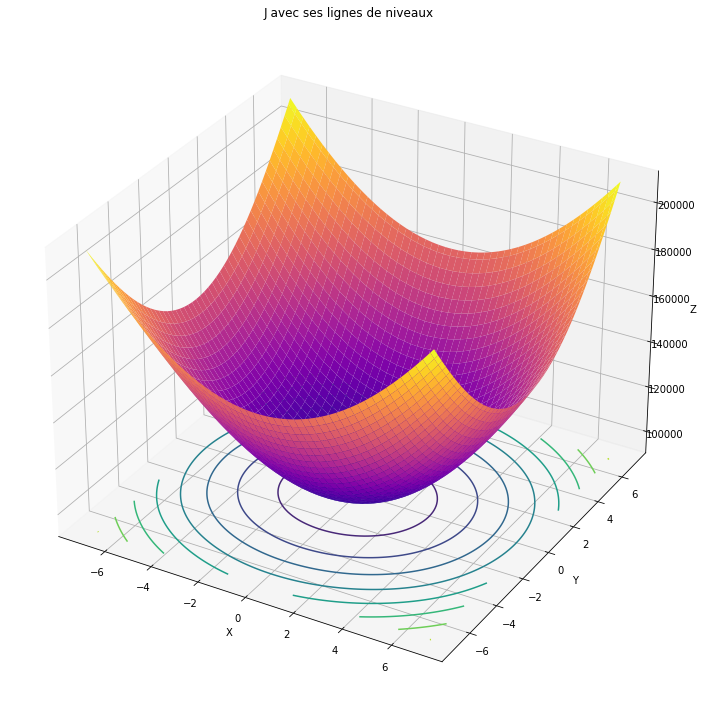

In [254]:
p=2
x1 = np.linspace(-7,7,100)
x2 = np.linspace(-7,7,100)

X, Y = np.meshgrid(x1,x2)
tab = np.array([X,Y])
Z = J(tab)

# Tracé du résultat en 3D
fig = plt.figure(1,(10,10))
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot_surface(X, Y, Z, cmap='plasma')  # Tracé des points 3D
ax.contour(X, Y, Z, zdir="z", offset=90000)

plt.title("J avec ses lignes de niveaux")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

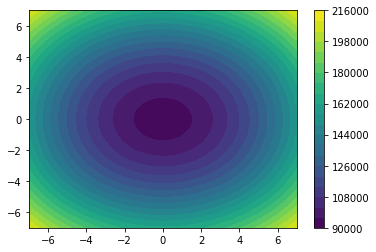

In [255]:
graphe = plt.contourf(X,Y,Z,20)
plt.colorbar()

### 1. Optimisation sans contraintes dans le plan

Question 1

Question 2

Question 3

Question 4

In [256]:
def orientation(P,Q,R):
    """
    1 si sens direct ie det matrice (PQ,PR) strictement positif
    -1 si sens direct ie det matrice strictement neg
    0 si sens direct ie det matrice nul
    """
    PQ = np.array([[P[0]-Q[0]],[P[1]-Q[1]]])
    PR = np.array([[P[0]-R[0]],[P[1]-R[1]]])
    M = np.concatenate((PQ,PR),axis=1)    
    det = np.linalg.det(M)
    if(det>0):
        return 1
    if(det<0):
        return -1
    return 0

In [257]:
#http://math.univ-lyon1.fr/irem/Formation_ISN/formation_recursivite/capes/capes2017Pb2.pdf
def jarvis(E) :
    """
     Fonction qui re¸coit en argument un nuage de points et qui renvoie
     une liste contenant les indices des sommets de l’enveloppe
     convexe de ce nuage
    """
    out = [] #c'est l'enveloppe convexe
    #pour chaque point
    for i in range(len(E)):
        for j in range(i+1,len(E)): #on compare chaque point à ceux d'apres
            sommets_a_tester = []
            
            for k in range(len(E)):
                if k!=i and k!=j : #on a pas le choix, on doit tout comparer entres eux
                    sommets_a_tester.append(orientation(E[i],E[j],E[k]))
            q = sommets_a_tester[0]
            sommet = True
            for v in sommets_a_tester :
                if(v!=q):
                    #print("sommets : ",sommets_a_tester," v = ",v," q = ",q)
                    sommet = False
            if sommet & (i not in out): #not in out pour pas le rajouter
                out.append(i)
            if sommet & (j not in out):
                out.append(j)
    return out

Question 5

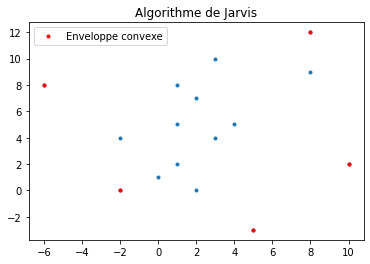

In [258]:
E = np.array([[1,2],[-2,0],[10,2],[4,5],[8,12],[1,8],[3,10],[8,9],[-6,8],[2,0],[2,7],[3,4],[5,-3],[-2,4],[0,1],[1,5]])
plt.plot(E[:,0],E[:,1],".")
plt.plot(E[jarvis(E),0],E[jarvis(E),1],'.r', label='Enveloppe convexe')
plt.title("Algorithme de Jarvis")
plt.legend()

On va choisir le point $\mathcal{A}=(1,5)$

Question 6

On teste les algorithmes à pas fixe, à pas optimal et du gradient conjugé.

In [259]:
def pasFixe(x0,rho):
    nMax=10000
    x = np.ones((nMax,2));  
    x[0] = x0
    k = 0
    while k+1 < nMax and (np.linalg.norm(abs(Jprime(x[k]))) >= eps):
        x[k+1] = x[k] - rho * Jprime(x[k])#x[k,0], x[k,1])
        k+=1
    return x[:k,],k

Le minimum [0.03760649 0.53825325] est trouvé au bout de 1913 itérations avec J(xMin)=8.7131


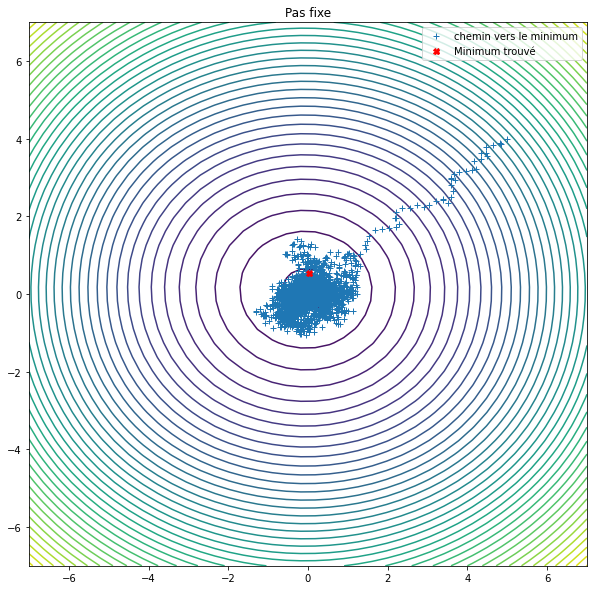

In [270]:
eps = 1e-3
x0 = np.array([5,4])
rho = 0.1
K = 40

x1 = np.linspace(-7,7,K)
x2 = np.linspace(-7,7,K)
X, Y = np.meshgrid(x1,x2)
Z = J(np.array([X,Y]))
X1, minimum = pasFixe(x0, rho)

plt.figure(1,(10,10))
plt.contour(X,Y,Z,40)
plt.plot(X1[:,0],X1[:,1], "+", label=f"chemin vers le minimum")
plt.plot(X1[minimum-1,0],X1[minimum-1,1], "Xr", label=f"Minimum trouvé")

plt.title("Pas fixe")
plt.legend()
print(f'Le minimum {X1[minimum-1]} est trouvé au bout de {minimum} itérations avec J(xMin)={J(X1[minimum-1]):.4f}')

In [271]:
#http://irma.math.unistra.fr/~franck/cours/TAN2020/TD_TP_4.pdf
#https://www.math.u-bordeaux.fr/~pjaming/stagetdsi2012/pierre.pdf

def pasOptimal(x0,rho0):
    nMax= 1000
    x = np.ones((nMax,2))
    rho = np.ones(nMax)
    f_k = np.zeros(nMax)+ rho0

    x[0] = x0
    rho[0] = rho0
      
    k = 0
    
    while k + 1 < nMax and np.linalg.norm(abs(Jprime(x[k]))) >= eps:
        #rhoTemp, lenght = pasFixe(rho[k],x0)#min(f_k)
        #rho[k+1] = np.linalg.norm(rhoTemp[lenght-1])
        for i in range(k):
            f_k[i] = J(x[k] - rho[i] * Jprime(x[k]))
        rho[k] = min(f_k)
        x[k+1] = x[k] - rho[k] * Jprime(x[k])
        k+=1
    return x[:k,], k

#X1 = pasOptimal(x0, rho)

Le minimum [-0.42860064  0.08521609], et vaut 4.5095 est trouvé au bout de 999 itérations


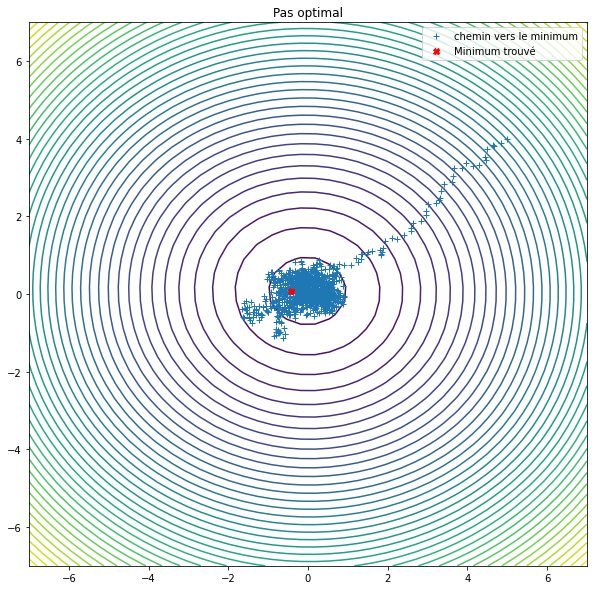

In [273]:
eps = 10e-4
x0 = np.array([5,4])
rho = 0.1
K = 40

x1 = np.linspace(-7,7,K)
x2 = np.linspace(-7,7,K)
X, Y = np.meshgrid(x1,x2)
Z = J(np.array([X,Y]))
X1, minimum = pasOptimal(x0, rho)

plt.figure(1,(10,10))
plt.contour(X,Y,Z,40)
plt.plot(X1[:,0],X1[:,1],"+", label=f"chemin vers le minimum")
plt.plot(X1[minimum-1,0],X1[minimum-1,1], "Xr", label=f"Minimum trouvé")

plt.title("Pas optimal")
plt.legend()

print(f'Le minimum {X1[minimum-1]}, et vaut {J(X1[minimum-1]):.4f} est trouvé au bout de {minimum} itérations')

In [274]:
#https://helios2.mi.parisdescartes.fr/~bgalerne/m1_optimisation/examen2016_corrige.pdf
def gradientConjugue(x0,rho0):
    nMax = 100
    x = np.ones((nMax,2))
    d = np.ones((nMax,2))

    rho = np.ones(nMax)
    f_k = np.zeros(nMax) + rho0
    
    x[0] = x0
    d[0] = Jprime(x0)
    rho[0] = rho0
    
    x[1] = x[0] - rho[0]*d[0]
    
    k = 1
    while k+1 < nMax and np.linalg.norm(abs(Jprime(x[k]))) >= eps:
        #d[k] = Jprime(x[k]) +  np.linalg.norm(Jprime(x[k]))**2/np.linalg.norm(x[k-1])**2 * d[k-1] #np.dot(Jprime(x[k]),Jprime(x[k])-Jprime(x[k-1]))*d[k-1]/np.linalg.norm(Jprime(x[k-1]))**2
        d[k] = Jprime(x[k]) + np.dot(Jprime(x[k]),(Jprime(x[k] - Jprime(x[k-1])))) * d[k-1]/np.linalg.norm(Jprime(x[k-1]))**2
        for i in range(k):
            f_k[i] = J(x[k] - rho[i] * d[k])
        rho[k] = min(f_k)
        x[k+1] = x[k] - rho[k] * d[k]
        k+=1
    return x[:k,], k

#X1 = pasOptimal(x0, rho)

Le minimum [0.32137093 0.25709675], et vaut 0.1694 est trouvé au bout de 99 itérations


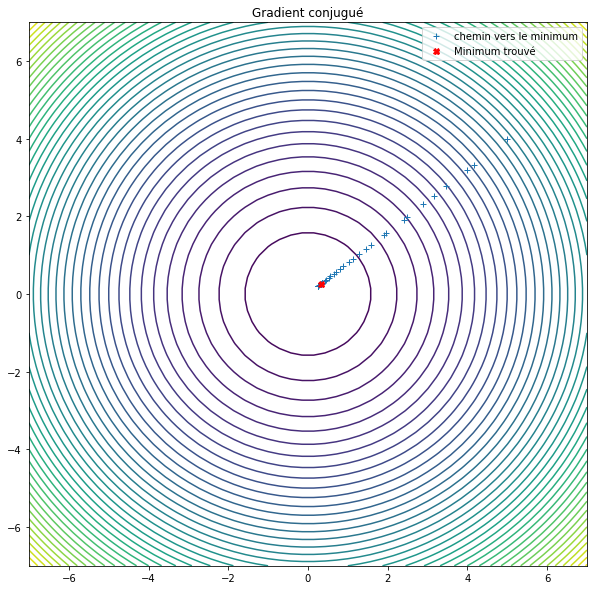

In [284]:
eps = 10e-3
x0 = np.array([5,4])
rho = 0.1
K = 50

x1 = np.linspace(-7,7,K)
x2 = np.linspace(-7,7,K)
X, Y = np.meshgrid(x1,x2)
Z = J(np.array([X,Y]))
X1, minimum = gradientConjugue(x0, rho)

plt.figure(1,(10,10))
plt.contour(X,Y,Z,40)
plt.plot(X1[:,0],X1[:,1], "+", label=f"chemin vers le minimum")
plt.plot(X1[minimum-1,0],X1[minimum-1,1], "Xr", label=f"Minimum trouvé")

plt.title("Gradient conjugué")
plt.legend()

print(f'Le minimum {X1[minimum-1]}, et vaut {J(X1[minimum-1]):.4f} est trouvé au bout de {minimum} itérations')

On va tester les temps que prennent les fonctions à s'exécuter

In [276]:
timeit.timeit()
gradientConjugue(x0,rho)
timeXconj = timeit.timeit()

timeit.timeit()
pasFixe(x0,rho)
timeXpasFixe = timeit.timeit()

timeit.timeit()
pasOptimal(x0,rho)
timeXpasOp = timeit.timeit()

print(timeXconj,timeXpasFixe,timeXpasOp)

0.006686130999696616 0.006195601999934297 0.006220586999916122


In [277]:
#le plus rapide est :
switch = {0 : "Gradient conjugué", 1: "pas fixe", 2: "pas optimal"}

idx = np.argmin([timeXconj,timeXpasFixe,timeXpasOp])
print("Le plus rapide est l'algorithme du",switch[idx])


Le plus rapide est l'algorithme du pas fixe




Manuellement on trouve que le minimum de cette fonction est 0. On va chercher quel algorithme atteint cette valeur en premier


In [278]:
Xconj,k1 = gradientConjugue(x0,rho)
XpasFixe,k2 = pasFixe(x0,rho)
XpasOp,k3 = pasOptimal(x0,rho)
Nmax = min(k1,k2,k3)
print("Max d'itérations : ",Nmax)
i = 0

while(i+1<Nmax):
    conj = Xconj[i] == [0,0]
    fixe = XpasFixe[i] == [0,0]
    op = XpasOp[i] == [0,0]
    if((conj[0] and conj[1]) or (fixe[0] and fixe[1]) or (op[0] and op[1])):
        print(f"i = {i} \n Gradient conjugué : {Xconj[i]} \n Pas fixe : {XpasFixe[i]} \n Pas optimal : {XpasOp[i]}")
        break;
    
    i+=1

print(f"i = {i} \n Gradient conjugué : {Xconj[i]} \n Pas fixe : {XpasFixe[i]} \n Pas optimal : {XpasOp[i]}")

Max d'itérations :  66
i = 65 
 Gradient conjugué : [-2.87016489 -0.12308249] 
 Pas fixe : [1.27829491 0.9790407 ] 
 Pas optimal : [0.65846136 0.66478013]


Question 7                                                                 
On implémente la méthode de Newton :

In [291]:
#######################   NEWTON   #################################
def J(tab):
    x = tab[0]
    y = tab[1]
    return x**2 + y**2

def Jprime(tab):
    x = tab[0]
    y = tab[1]
    return np.array([2*x,2*y])

In [286]:
def methodeNewton(x0):
    nMax=10000
    x = np.ones((nMax,2));  
    x[0] = x0    
    dif = 2
    k = 0
    while k+1 < nMax and (np.linalg.norm(abs(dif)) >= eps):
        x[k+1] = x[k] - J(x[k])/Jprime(x[k])
        dif = np.linalg.norm(x[k+1]-x[k])
        k+=1
    return x[:k,],k


Le minimum [0.01281445 0.01025156], et vaut 0.0003 est trouvé au bout de 6 itérations


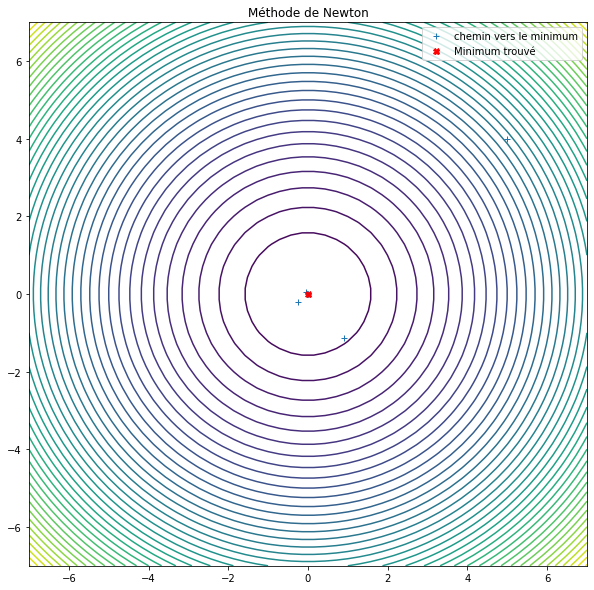

In [292]:
eps = 10e-3
x0 = np.array([5,4])
K = 50

x1 = np.linspace(-7,7,K)
x2 = np.linspace(-7,7,K)
X, Y = np.meshgrid(x1,x2)
Z = J(np.array([X,Y]))
X1, minimum = methodeNewton(x0)

plt.figure(1,(10,10))
plt.contour(X,Y,Z,40)
plt.plot(X1[:,0],X1[:,1], "+", label=f"chemin vers le minimum")
plt.plot(X1[minimum-2,0],X1[minimum-2,1], "Xr", label=f"Minimum trouvé")
plt.title("Méthode de Newton")
plt.legend()

print(f'Le minimum {X1[minimum-2]}, et vaut {J(X1[minimum-2]):.4f} est trouvé au bout de {minimum} itérations')

### 2. Projections et mise en oeuvre pratique

On considère un ensemble de villes sur la planète qui seront repérées par leur latitude et longitude. Dans un premier temps : Alger, Antananarivo, Atlanta, Cape Town, Dakkar, Irkoutsk, Le Caire, Libreville, Moscou, Nairobi, New Dehli, Paris, P´ekin, Quito, Rome, Seattle, Sidney, Stockholm, Tokyo.

    Se ramener a une optimisation dans le plan a l’aide du systeme de projection choisi.
    Modifier le probleme d’optimisation precedent de sorte a tenir de la déformation des géodésiques de la sphere par la projection.
    Les optimaux obtenus sont ils tres diff´erents suivant ces deux m´ethodes.



In [293]:
villes = np.array(["Alger", "Antananarivo", "Atlanta", "Cape Town", 
                   "Dakkar", "Irkoutsk", "Le Caire", "Libreville", 
                   "Moscou", "Nairobi", "New Dehli", "Paris", "Pekin", 
                   "Quito", "Rome", "Seattle", "Sidney", "Stockholm", 
                   "Tokyo"])

In [294]:
villes_lat = {
          "Alger": [36.7762,3.05997], 
          "Antananarivo" : [-18.933333,47.516667], 
          "Atlanta" : [33.7489954, -84.3879824], 
          "Cape Town" : [-33.924869,18.424055],  
          "Dakkar" : [14.7645042,-17.3660286], 
          "Irkoutsk" : [52.3167,104.233] , 
          "Le Caire" : [30.044420,31.235712], 
          "Libreville" : [0.390100,9.454400], 
          "Moscou" : [55.757425,37.619183], 
          "Nairobi" : [-1.2920659,36.8219462], 
          "New Dehli" : [28.644800,77.216721], 
          "Paris" : [48.856614,2.3522219], 
          "Pekin" : [39.904211,116.407395], 
          "Quito" : [-0.225219,-78.5248], 
          "Rome" : [41.902784,12.496366], 
          "Seattle" : [47.6062095,-122.3320708], 
          "Sidney" : [-33.8674869,151.2069902], 
          "Stockholm" : [59.3293235,18.0685808], 
          "Tokyo" : [35.6894,139.692]
        }

In [295]:
#import pip
#pip.main(['install','pygmt'])

https://linogaliana-teaching.netlify.app/geopandas/

https://linuxtut.com/fr/d41b74f3e5504d5c74a3/


https://medium.com/@_FrancoisM/introduction-%C3%A0-la-manipulation-de-donn%C3%A9es-cartographiques-23b4e38d8f0f

In [312]:
import pandas as pd
import geopandas as gpd
from mpl_toolkits.mplot3d import Axes3D
import geoplot as gplt
import geoplot.crs as gcrs
#python3.7 -m pip install --upgrade geopandas

19

In [338]:
villes_lat = {
          "Alger": [36.7762,3.05997], 
          "Antananarivo" : [-18.933333,47.516667], 
          "Atlanta" : [33.7489954, -84.3879824], 
          "Cape Town" : [-33.924869,18.424055],  
          "Dakkar" : [14.7645042,-17.3660286], 
          "Irkoutsk" : [52.3167,104.233] , 
          "Le Caire" : [30.044420,31.235712], 
          "Libreville" : [0.390100,9.454400], 
          "Moscou" : [55.757425,37.619183], 
          "Nairobi" : [-1.2920659,36.8219462], 
          "New Dehli" : [28.644800,77.216721], 
          "Paris" : [48.856614,2.3522219], 
          "Pekin" : [39.904211,116.407395], 
          "Quito" : [-0.225219,-78.5248], 
          "Rome" : [41.902784,12.496366], 
          "Seattle" : [47.6062095,-122.3320708], 
          "Sidney" : [-33.8674869,151.2069902], 
          "Stockholm" : [59.3293235,18.0685808], 
          "Tokyo" : [35.6894,139.692]
        }


dataFrame = pd.DataFrame(
            {'City':['Alger', 'Antananarivo', 'Atlanta', 'Cape Town', 'Dakkar','Irkoutsk', 'Le Caire', 'Libreville',
                     'Moscou', 'Nairobi','New Dehli', 'Paris', 'Pekin', 'Quito', 'Rome', 'Seattle','Sidney',
                     'Stockholm','Tokyo'],
            # 'Country' : ['Algeria', 'Madagascar', 'USA', 'South Africa', 'Senegal', 'Egypt', 'France', 'Gabon', 
             #            'Russia', 'Kenya', 'India', 'France', 'China', 'Ecuador', 'Italia', 'USA', 'Australia',
              #           'Sweden', 'Japan'],
             'Latitude': [36.7762, -18.933333, 33.7489954, -33.924869, 14.7645042, 52.3167, 30.04442, 0.3901, 
                          55.757425, -1.2920659, 28.6448, 48.856614, 39.904211, -0.225219, 41.902784, 47.6062095,
                          -33.8674869, 59.3293235, 35.6894],
             'Longitude': [3.05997, 47.516667, -84.3879824, 18.424055, -17.3660286, 104.233, 31.235712, 9.4544,
                           37.619183, 36.8219462, 77.216721, 2.3522219, 116.407395, -78.5248, 12.496366,
                           -122.3320708, 151.2069902, 18.0685808, 139.692],
            'Elevation' : [82., 1318., 289., 41., 5., 496., 67., 10., 170., 1692., 227., 66., 67., 2885., 176.,
                           75., 280., 31., 18.]
            })


gdf = gpd.GeoDataFrame(dataFrame, geometry=gpd.points_from_xy(dataFrame.Longitude, dataFrame.Latitude))

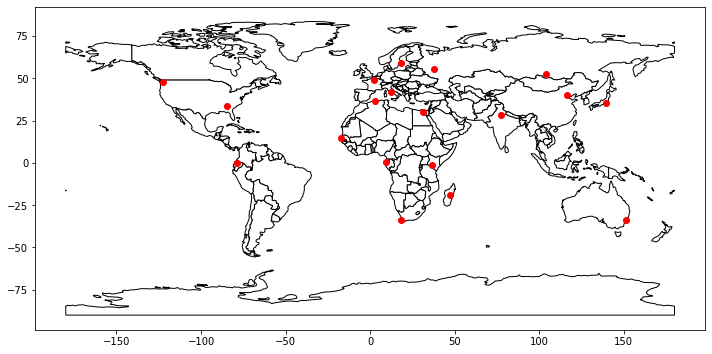

In [331]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(figsize=(12,12),color='white', edgecolor='black')
ax.set_aspect('equal')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red',label='Villes')

plt.show()

In [332]:
#on réécrit bien les fonctions
def J(x,y):
    out = 0
    for i in range(x.size):
        out += (abs(x[0]-y[i][0])**p + abs(x[1]-y[i][1])**p)**(1/p)
    return out

def Jprime(x,y):
    out = np.array([0.,0.])
    for i in range(x.size):
        out[0] += (abs(x[0]-y[i][0])**p + abs(x[1]-y[i][1])**p)**(1/p-1)*abs(x[0]-y[i][0])**(p-1)
        out[1] += (abs(x[0]-y[i][0])**p + abs(x[1]-y[i][1])**p)**(1/p-1)*abs(x[1]-y[i][1])**(p-1)
    return out

In [333]:
#on a le data frame avec les villes
dist = np.ones(len(dataFrame['City']))
i=0
for city in villes_lat:
    #on initialise le df
    df = pd.DataFrame(dataFrame) 
    
    #on enleve du df la ville courante
    indexNames = df[df['City']==city].index
    df.drop(indexNames , inplace=True)
    
    #on cree un tableau des lat et long des autres villes du df
    autresVilles = np.array([df['Latitude'],df['Longitude']])
    
    #on appelle J
    j = J(np.array(villes_lat[city]),autresVilles)
    #on sauvegarde la distance de city aux autres villes
    dist[i] = j
    i+=1

idxMin = np.argmin(dist)
print("La ville la plus proche de toutes les autres est",dataFrame['City'][idxMin])

#il faut faire ça mais appeler des fonctions pour optimiser et trouver le min pour chaque ville

La ville la plus proche de toutes les autres est Nairobi


/usr/lib/python3/dist-packages/cartopy/mpl/geoaxes.py:360: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


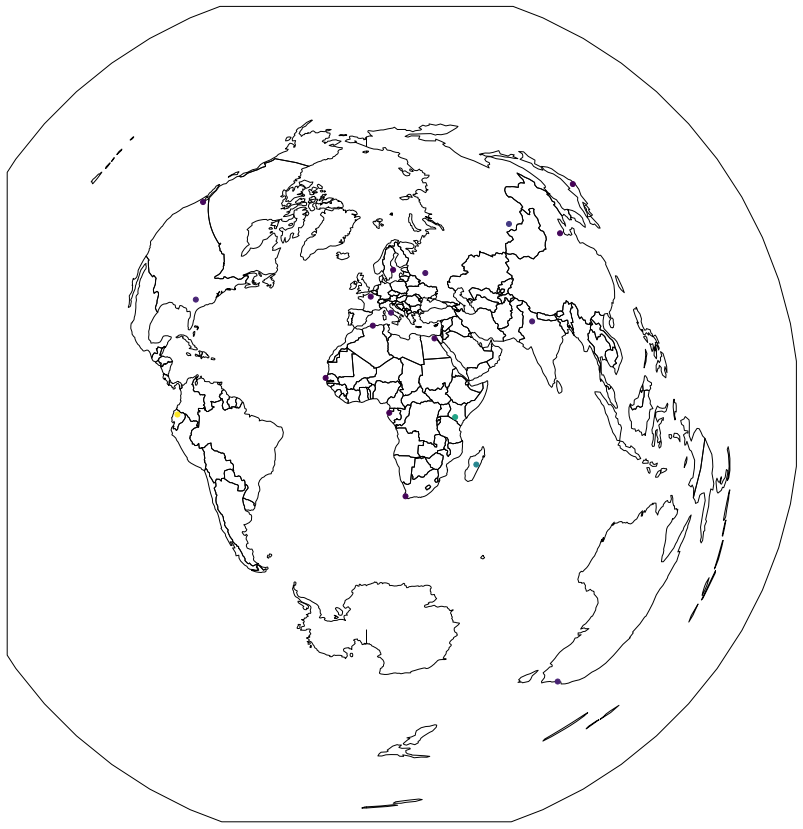

In [339]:
ax = gplt.polyplot(world, projection=gplt.crs.AzimuthalEquidistant(), figsize=(15,15))
gplt.pointplot(gdf, ax=ax, hue='Elevation')#, hue=np.ones(19)*0.7) #faire hue
ax.outline_patch.set_visible(True)

/usr/lib/python3/dist-packages/cartopy/mpl/geoaxes.py:360: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


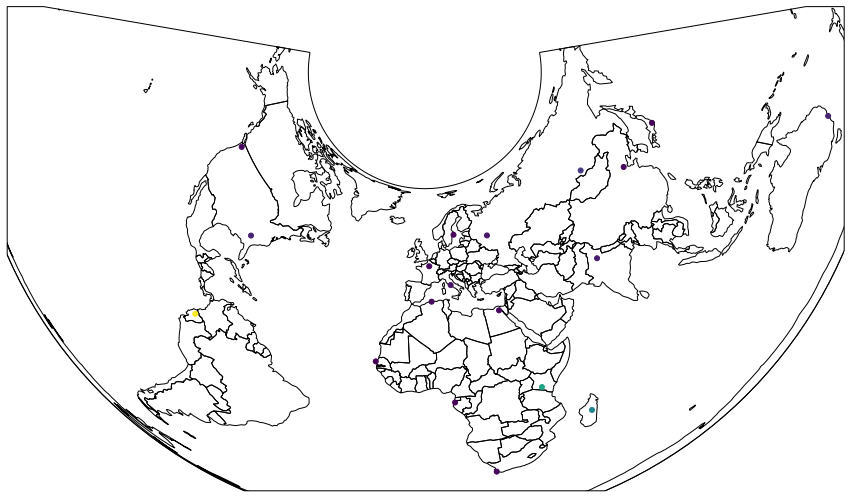

In [335]:
ax = gplt.polyplot(world,projection=gcrs.AlbersEqualArea(),figsize=(15,15))
gplt.pointplot(gdf, ax=ax, hue='Elevation')
ax.outline_patch.set_visible(True)

## Cas contraint